In [1]:
!pip install sklearn

You should consider upgrading via the 'c:\users\vladp\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
application_train = pd.read_csv('application_train.csv')
application_test = pd.read_csv('application_test.csv')

# Dimension of data

In [4]:
print(f"Train set dimension: {application_train.shape}")
print(f"Test set dimension: {application_test.shape}")

Train set dimension: (307511, 122)
Test set dimension: (48744, 121)


# Univariate Analysis

# Handle missing values

In [5]:
def missing_values(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = total / len(data) * 100
    return total, percent

In [6]:
missing_values(application_train)[1]

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [7]:
missing_values(application_test)[1]

COMMONAREA_AVG                  68.716150
COMMONAREA_MODE                 68.716150
COMMONAREA_MEDI                 68.716150
NONLIVINGAPARTMENTS_AVG         68.412523
NONLIVINGAPARTMENTS_MODE        68.412523
NONLIVINGAPARTMENTS_MEDI        68.412523
FONDKAPREMONT_MODE              67.284179
LIVINGAPARTMENTS_AVG            67.249302
LIVINGAPARTMENTS_MODE           67.249302
LIVINGAPARTMENTS_MEDI           67.249302
FLOORSMIN_MEDI                  66.605121
FLOORSMIN_AVG                   66.605121
FLOORSMIN_MODE                  66.605121
OWN_CAR_AGE                     66.289184
YEARS_BUILD_AVG                 65.275726
YEARS_BUILD_MEDI                65.275726
YEARS_BUILD_MODE                65.275726
LANDAREA_MEDI                   57.964057
LANDAREA_AVG                    57.964057
LANDAREA_MODE                   57.964057
BASEMENTAREA_MEDI               56.706466
BASEMENTAREA_AVG                56.706466
BASEMENTAREA_MODE               56.706466
NONLIVINGAREA_AVG               53

In [8]:
data = application_train.append(application_test)

In [9]:
missing_values(data)[1]

COMMONAREA_AVG                  69.714109
COMMONAREA_MODE                 69.714109
COMMONAREA_MEDI                 69.714109
NONLIVINGAPARTMENTS_AVG         69.293343
NONLIVINGAPARTMENTS_MODE        69.293343
NONLIVINGAPARTMENTS_MEDI        69.293343
FONDKAPREMONT_MODE              68.235393
LIVINGAPARTMENTS_MEDI           68.203674
LIVINGAPARTMENTS_AVG            68.203674
LIVINGAPARTMENTS_MODE           68.203674
FLOORSMIN_AVG                   67.678489
FLOORSMIN_MODE                  67.678489
FLOORSMIN_MEDI                  67.678489
YEARS_BUILD_AVG                 66.330578
YEARS_BUILD_MEDI                66.330578
YEARS_BUILD_MODE                66.330578
OWN_CAR_AGE                     66.031635
LANDAREA_MEDI                   59.183450
LANDAREA_AVG                    59.183450
LANDAREA_MODE                   59.183450
BASEMENTAREA_AVG                58.268375
BASEMENTAREA_MODE               58.268375
BASEMENTAREA_MEDI               58.268375
NONLIVINGAREA_AVG               54

Видаляємо колонки, де більше 12% пропущених значень.

In [10]:
missing_val = (missing_values(data)[1])[missing_values(data)[1] > 12]
missing_val = missing_val.drop(labels = ['TARGET'])
data = data.drop(columns = missing_val.keys())

In [11]:
application_train = application_train.drop(columns = missing_val.keys())
application_test = application_test.drop(columns = missing_val.keys())

У стовпчиках EXT_SOURCE_2, DEF_60_CNT_SOCIAL_CIRCLE, OBS_30_CNT_SOCIAL_CIRCLE, AMT_ANNUITY, DAYS_LAST_PHONE_CHANGE відсуті декілька значення. Замінимо їх середніми значеннями. (Numerical)

In [12]:
application_train[['EXT_SOURCE_2', 'DEF_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'AMT_ANNUITY', 'DAYS_LAST_PHONE_CHANGE']] = application_train[['EXT_SOURCE_2', 'DEF_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'AMT_ANNUITY', 'DAYS_LAST_PHONE_CHANGE']].fillna(value=application_train[['EXT_SOURCE_2', 'DEF_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'AMT_ANNUITY', 'DAYS_LAST_PHONE_CHANGE']].mean())
application_test[['EXT_SOURCE_2', 'DEF_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'AMT_ANNUITY']]= application_test[['EXT_SOURCE_2', 'DEF_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'AMT_ANNUITY']].fillna(value = application_train[['EXT_SOURCE_2', 'DEF_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'AMT_ANNUITY']].mean())

In [13]:
def handle_own_car_age_missing(data):
    for i in range(len(data.OWN_CAR_AGE)):
        if pd.isnull(data.OWN_CAR_AGE[i]):
            data.loc[i,'OWN_CAR_AGE'] = 0
        else:
            data.loc[i,'OWN_CAR_AGE'] += 1

# Removing duplicates

In [14]:
application_train[application_train.duplicated()]
application_test[application_test.duplicated()]

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21


# Description


In [15]:
application_test.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48744.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48715.000000,48715.000000,48744.000000,48744.000000,48744.0,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.0,48744.000000,48744.0,48744.0,48744.0,48744.0,48744.0,48744.0,48744.000000,48744.0,48744.0,48744.0
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29425.099064,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,-3051.712949,0.999979,0.809720,0.204702,0.998400,0.263130,0.162646,2.146767,2.038159,2.012596,12.007365,0.018833,0.055166,0.042036,0.077466,0.224664,0.174216,0.518020,1.447629,0.143652,1.435738,0.101139,-1077.766228,0.0,0.786620,0.000103,0.014751,0.087477,0.000041,0.088462,0.004493,0.0,0.001169,0.0,0.0,0.0,0.0,0.0,0.0,0.001559,0.0,0.0,0.0
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16012.507319,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,1569.276709,0.004529,0.392526,0.403488,0.039971,0.440337,0.369046,0.890423,0.522694,0.515804,3.278172,0.135937,0.228306,0.200673,0.267332,0.417365,0.379299,0.181263,3.606980,0.514413,3.580125,0.403671,878.920740,0.0,0.409698,0.010128,0.120554,0.282536,0.006405,0.283969,0.066879,0.0,0.034176,0.0,0.0,0.0,0.0,0.0,0.0,0.039456,0.0,0.0,0.0
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,-6348.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000008,0.000000,0.000000,0.000000,0.000000,-4361.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,-4448.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.408082,0.000000,0.000000,0.000000,0.000000,-1766.250000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26221.500000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,-3234.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.558728,0.000000,0.000000,0.000000,0.000000,-863.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.5000

In [16]:
application_train.describe(include="all")

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.072330e+05,306219,307511,307511,307511,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511,3.075110e+05,307511.000000,306490.000000,306490.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,NaN,7,8,5,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,NaN,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TUESDAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Business Entity Type 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,278232,202448,202924,213312,NaN,NaN,NaN,NaN,NaN,248526,158774,218391,196432,272868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,278180.518577,0.080729,NaN,NaN,NaN,NaN,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,NaN,NaN,NaN,NaN,NaN,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,NaN,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,NaN,5.143927e-01,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335
std,102790.175348,0.272419,NaN,NaN,NaN,NaN,0.722121,2.371231e+05,4.024908e+05,14493.454517,3.694465e+05,NaN,NaN,NaN,NaN,NaN,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,NaN,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,NaN,1.908550e-01,2.397000,0.446698,2.379803,0.361689,826.807143,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0

# Handling type of features

In [17]:
categorical_features = {"NAME_CONTRACT_TYPE","CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY","NAME_TYPE_SUITE","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","FLAG_MOBIL","FLAG_EMP_PHONE","FLAG_WORK_PHONE","FLAG_CONT_MOBILE","FLAG_PHONE","FLAG_EMAIL","REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY","WEEKDAY_APPR_PROCESS_START","REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION","REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY","ORGANIZATION_TYPE","FLAG_DOCUMENT_2","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4","FLAG_DOCUMENT_5","FLAG_DOCUMENT_6","FLAG_DOCUMENT_7","FLAG_DOCUMENT_8","FLAG_DOCUMENT_9","FLAG_DOCUMENT_10","FLAG_DOCUMENT_11","FLAG_DOCUMENT_12","FLAG_DOCUMENT_13","FLAG_DOCUMENT_14","FLAG_DOCUMENT_15","FLAG_DOCUMENT_16","FLAG_DOCUMENT_17","FLAG_DOCUMENT_18","FLAG_DOCUMENT_19","FLAG_DOCUMENT_20","FLAG_DOCUMENT_21"}
for feature in categorical_features:
    application_train[feature] = application_train[feature].astype("category")

#categorical_features.remove('TARGET')
for feature in categorical_features:
    application_test[feature] = application_test[feature].astype("category")

In [18]:
application_train.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE             category
CODE_GENDER                    category
FLAG_OWN_CAR                   category
FLAG_OWN_REALTY                category
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                category
NAME_INCOME_TYPE               category
NAME_EDUCATION_TYPE            category
NAME_FAMILY_STATUS             category
NAME_HOUSING_TYPE              category
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
FLAG_MOBIL                     category
FLAG_EMP_PHONE                 category
FLAG_WORK_PHONE                category
FLAG_CONT_MOBILE               category


In [19]:
numerical_features = application_train.select_dtypes(include=['float64','int64']).columns
numerical_features = numerical_features.drop(labels = ['SK_ID_CURR','TARGET'])
numerical_features

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

In [20]:
application_train.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE             category
CODE_GENDER                    category
FLAG_OWN_CAR                   category
FLAG_OWN_REALTY                category
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                category
NAME_INCOME_TYPE               category
NAME_EDUCATION_TYPE            category
NAME_FAMILY_STATUS             category
NAME_HOUSING_TYPE              category
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
FLAG_MOBIL                     category
FLAG_EMP_PHONE                 category
FLAG_WORK_PHONE                category
FLAG_CONT_MOBILE               category


array([[<AxesSubplot:title={'center':'CNT_CHILDREN'}>,
        <AxesSubplot:title={'center':'AMT_INCOME_TOTAL'}>,
        <AxesSubplot:title={'center':'AMT_CREDIT'}>,
        <AxesSubplot:title={'center':'AMT_ANNUITY'}>],
       [<AxesSubplot:title={'center':'AMT_GOODS_PRICE'}>,
        <AxesSubplot:title={'center':'REGION_POPULATION_RELATIVE'}>,
        <AxesSubplot:title={'center':'DAYS_BIRTH'}>,
        <AxesSubplot:title={'center':'DAYS_EMPLOYED'}>],
       [<AxesSubplot:title={'center':'DAYS_REGISTRATION'}>,
        <AxesSubplot:title={'center':'DAYS_ID_PUBLISH'}>,
        <AxesSubplot:title={'center':'CNT_FAM_MEMBERS'}>,
        <AxesSubplot:title={'center':'HOUR_APPR_PROCESS_START'}>],
       [<AxesSubplot:title={'center':'EXT_SOURCE_2'}>,
        <AxesSubplot:title={'center':'OBS_30_CNT_SOCIAL_CIRCLE'}>,
        <AxesSubplot:title={'center':'DEF_30_CNT_SOCIAL_CIRCLE'}>,
        <AxesSubplot:title={'center':'OBS_60_CNT_SOCIAL_CIRCLE'}>],
       [<AxesSubplot:title={'center':'DEF

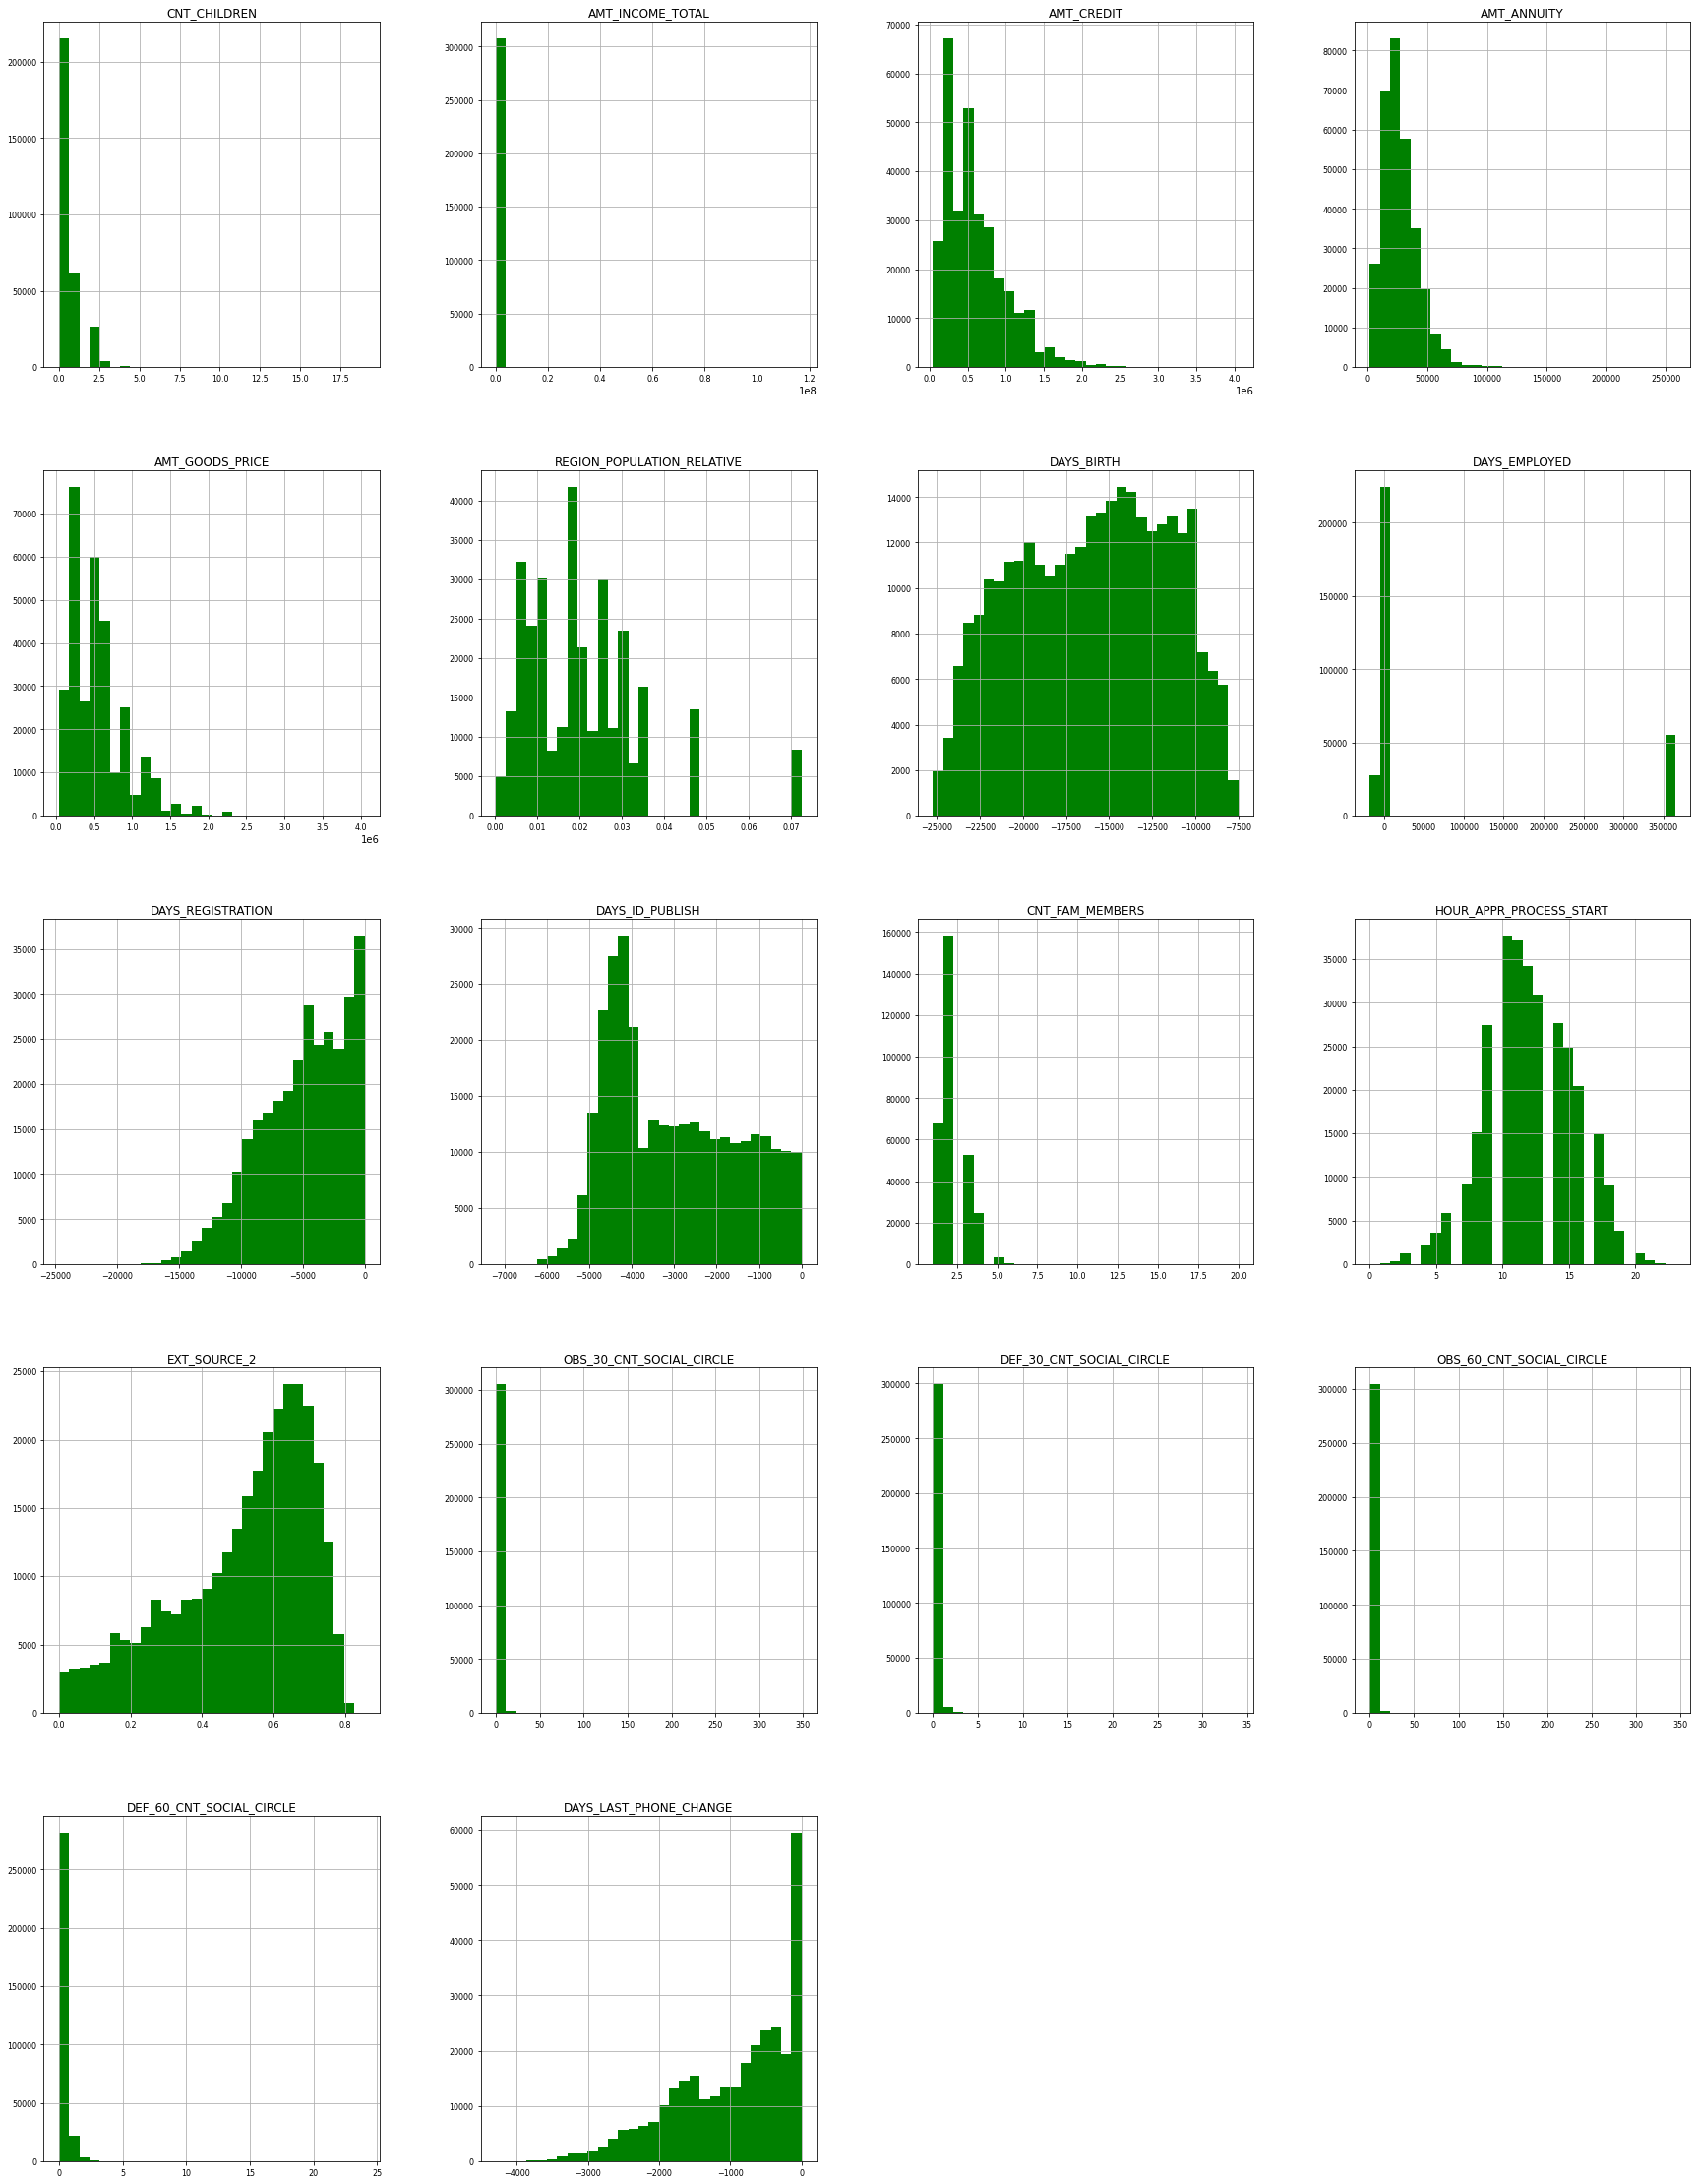

In [21]:
application_train[numerical_features].hist(figsize=(30,40), color='g', bins=30, xlabelsize=8, ylabelsize=8)

array([[<AxesSubplot:title={'center':'CNT_CHILDREN'}>,
        <AxesSubplot:title={'center':'AMT_INCOME_TOTAL'}>,
        <AxesSubplot:title={'center':'AMT_CREDIT'}>,
        <AxesSubplot:title={'center':'AMT_ANNUITY'}>],
       [<AxesSubplot:title={'center':'AMT_GOODS_PRICE'}>,
        <AxesSubplot:title={'center':'REGION_POPULATION_RELATIVE'}>,
        <AxesSubplot:title={'center':'DAYS_BIRTH'}>,
        <AxesSubplot:title={'center':'DAYS_EMPLOYED'}>],
       [<AxesSubplot:title={'center':'DAYS_REGISTRATION'}>,
        <AxesSubplot:title={'center':'DAYS_ID_PUBLISH'}>,
        <AxesSubplot:title={'center':'CNT_FAM_MEMBERS'}>,
        <AxesSubplot:title={'center':'HOUR_APPR_PROCESS_START'}>],
       [<AxesSubplot:title={'center':'EXT_SOURCE_2'}>,
        <AxesSubplot:title={'center':'OBS_30_CNT_SOCIAL_CIRCLE'}>,
        <AxesSubplot:title={'center':'DEF_30_CNT_SOCIAL_CIRCLE'}>,
        <AxesSubplot:title={'center':'OBS_60_CNT_SOCIAL_CIRCLE'}>],
       [<AxesSubplot:title={'center':'DEF

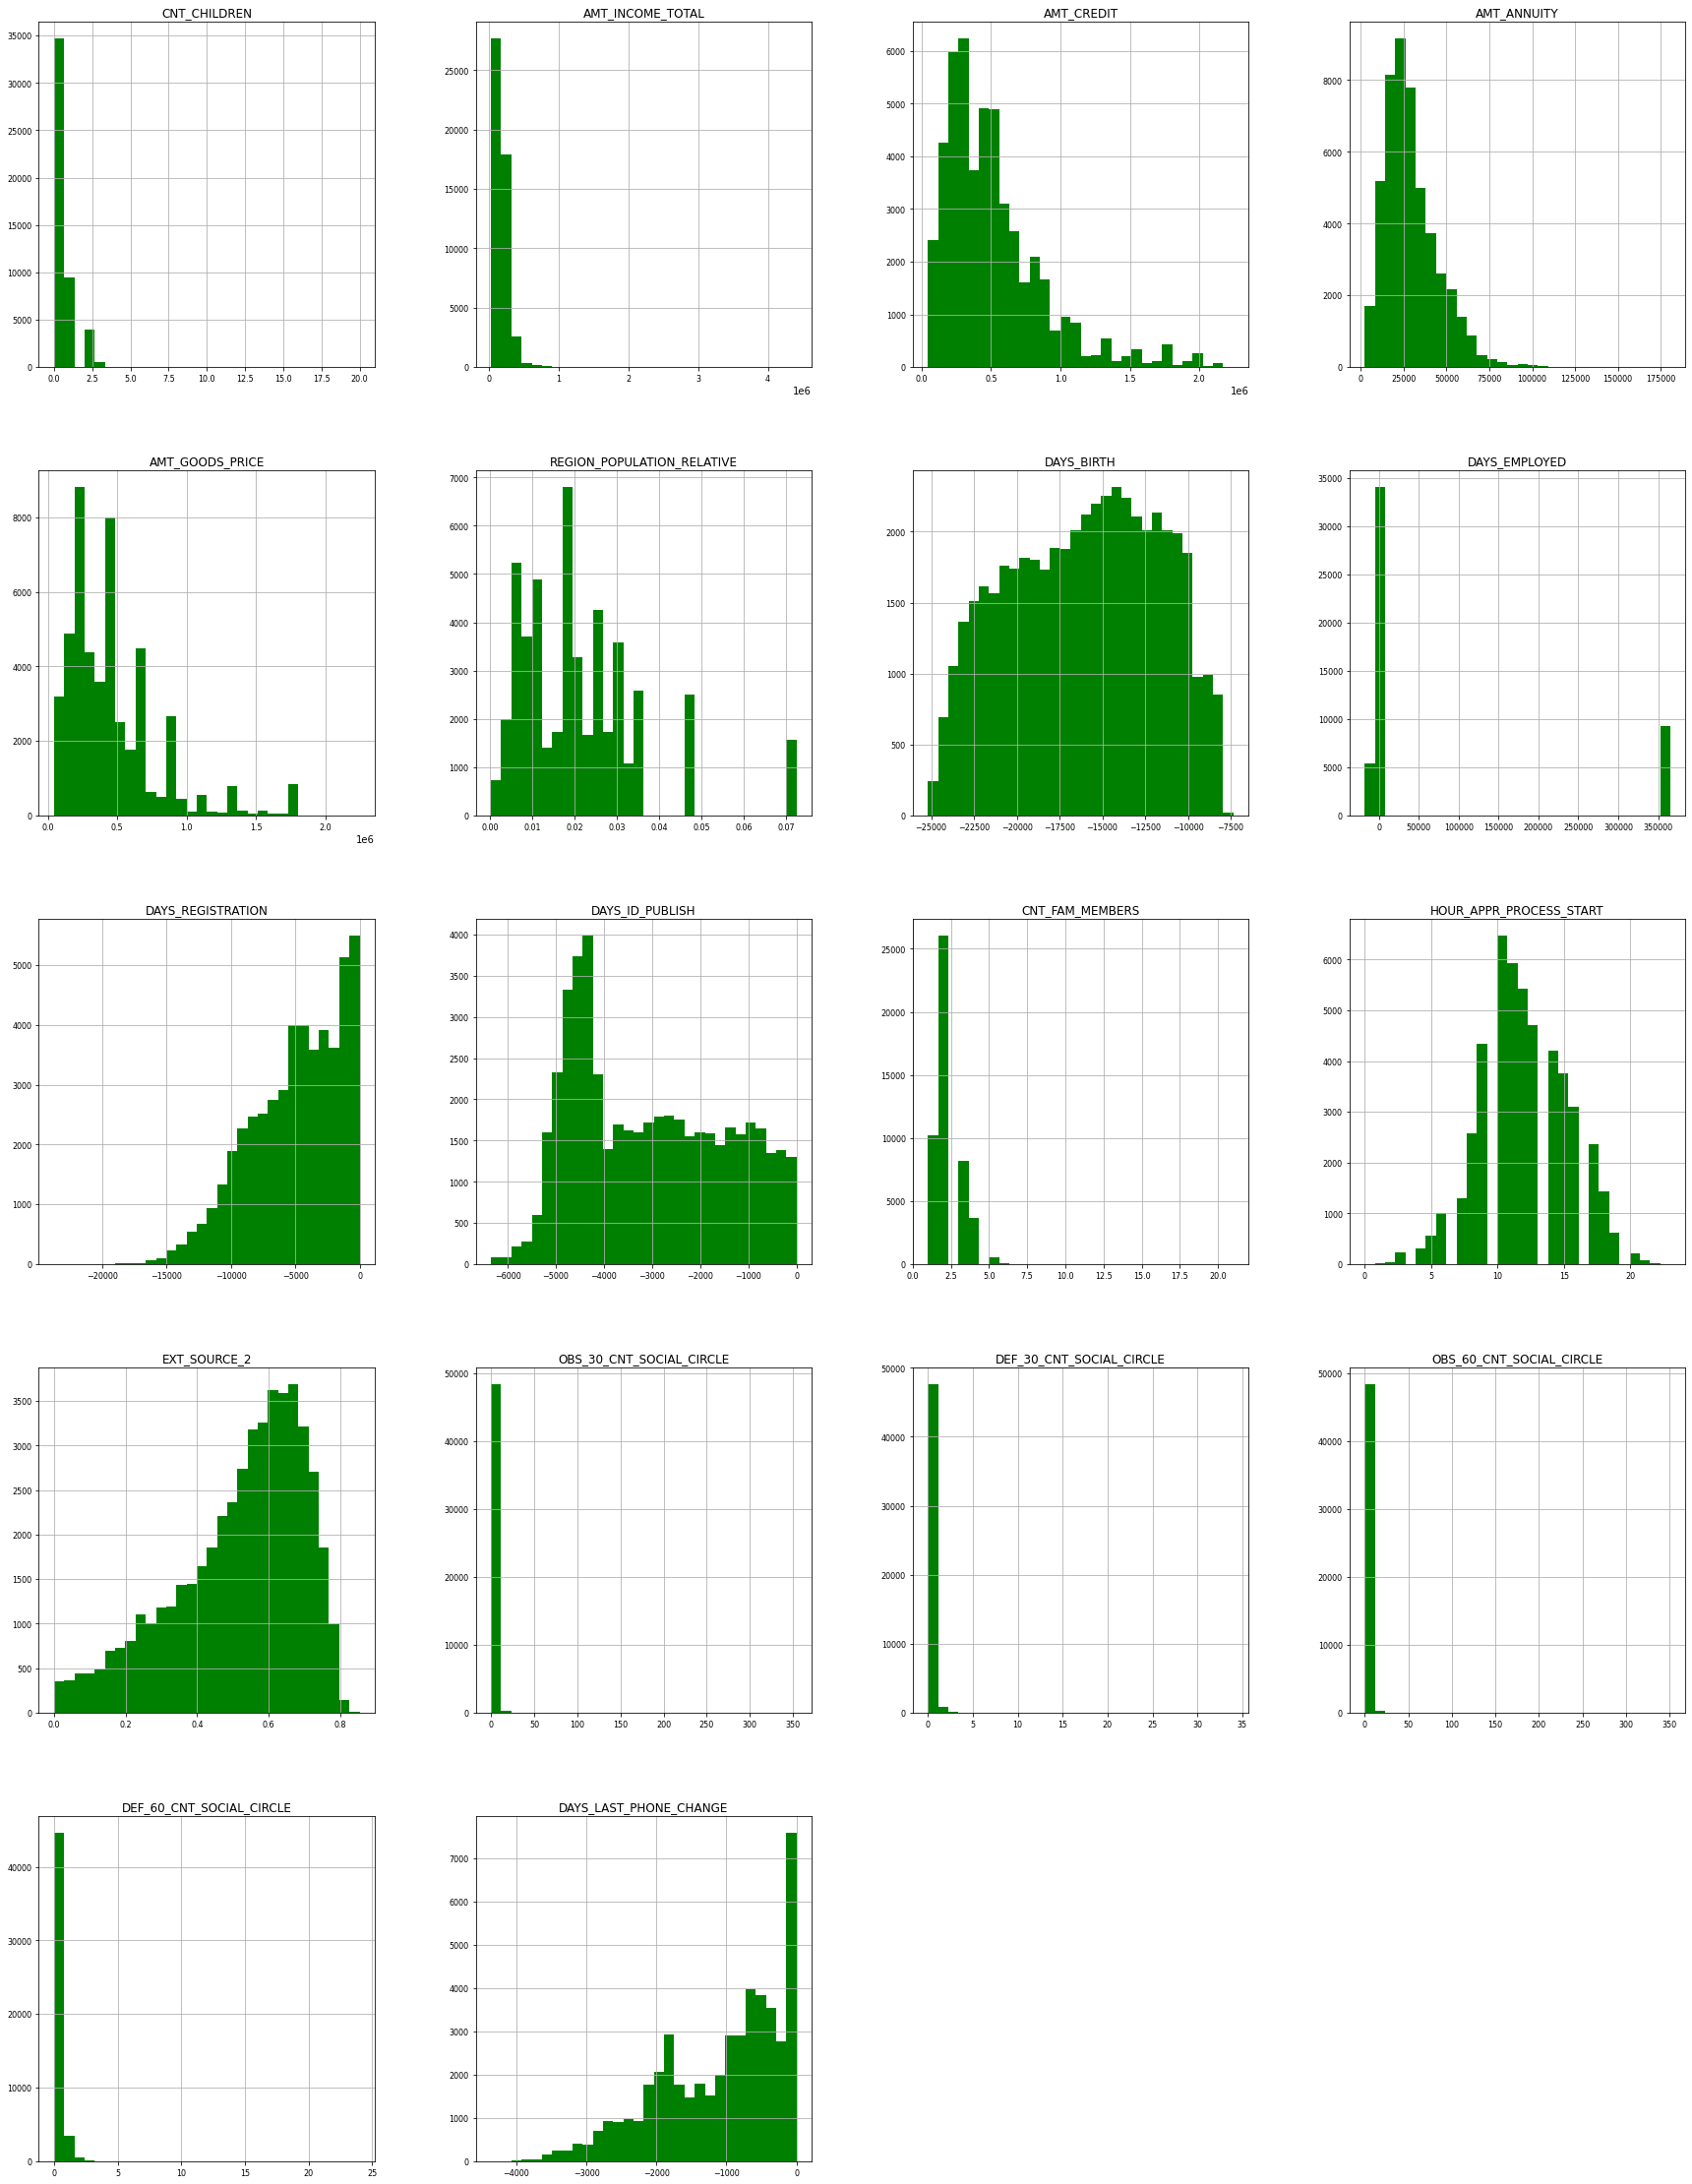

In [22]:
application_test[numerical_features].hist(figsize=(30,40), color='g', bins=30, xlabelsize=8, ylabelsize=8)

Дані, що наданих документів сильно незбалансовані (лише дуже мала частина людей надала хоч якісь документи), тому позбудемось цих колонок. Також SK_ID_CURR не надає жодної інформації, проте його потрібно залишити дл отримання результатів класифікації. 

In [23]:
application_train = application_train.drop(columns=['FLAG_DOCUMENT_2','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21'])
application_test = application_test.drop(columns=['FLAG_DOCUMENT_2','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21'])
categorical_features = categorical_features.difference({'FLAG_DOCUMENT_2','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21'})

In [24]:
application_train['DAYS_BIRTH'] = abs(application_train['DAYS_BIRTH'])
application_test['DAYS_BIRTH'] = abs(application_test['DAYS_BIRTH'])
application_train['DAYS_REGISTRATION'] = abs(application_train['DAYS_REGISTRATION'])
application_test['DAYS_REGISTRATION'] = abs(application_test['DAYS_REGISTRATION'])
application_train['DAYS_ID_PUBLISH'] = abs(application_train['DAYS_ID_PUBLISH'])
application_test['DAYS_ID_PUBLISH'] = abs(application_test['DAYS_ID_PUBLISH'])
application_train['DAYS_LAST_PHONE_CHANGE'] = abs(application_train['DAYS_LAST_PHONE_CHANGE'])
application_test['DAYS_LAST_PHONE_CHANGE'] = abs(application_test['DAYS_LAST_PHONE_CHANGE'])

# Scaling

Потрібно привести значення у стовпчиках AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE до зручного діапазону.

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
std_scaler = StandardScaler()

In [27]:
features_to_scale = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE','DAYS_EMPLOYED']

In [28]:
def scale(data, features):
    for feature in features:
        data[feature] = std_scaler.fit_transform(data[[feature]])

In [29]:
scale(application_train, features_to_scale)
scale(application_test, features_to_scale)

# Bivariate Analysis

In [30]:
application_train.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,-0.000433,-0.000232,0.000849,0.001500,0.001366,0.000973,0.000384,-0.002895,0.000350,0.002339,-0.001407,-0.000082,-0.001423,0.001185,0.000858
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,-0.037227,-0.078239,-0.044932,-0.041975,-0.051457,0.009308,-0.024166,-0.160303,0.009123,0.032248,0.009022,0.031251,-0.055218
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.012882,0.002145,0.021374,-0.001827,-0.025573,-0.330938,-0.239818,-0.183395,0.028019,0.879161,-0.007292,-0.017996,0.015570,-0.001262,0.015232,-0.001858,0.005865
AMT_INCOME_TOTAL,-0.001820,-0.003982,0.012882,1.000000,0.156870,0.191657,0.159610,0.074796,-0.027261,-0.064223,-0.027805,-0.008506,0.016342,0.036459,0.060917,-0.013085,-0.013244,-0.013015,-0.013121,0.018585
AMT_CREDIT,-0.000343,-0.030369,0.002145,0.156870,1.000000,0.770127,0.986968,0.099738,0.055436,-0.066838,-0.009621,0.006575,0.063160,0.052738,0.131129,0.000189,-0.021229,0.000239,-0.023731,0.073701
AMT_ANNUITY,-0.000433,-0.012817,0.021374,0.191657,0.770127,1.000000,0.775098,0.118424,-0.009445,-0.104331,-0.038513,-0.011268,0.075539,0.052269,0.125702,-0.011955,-0.022833,-0.011730,-0.023937,0.063746
AMT_GOODS_PRICE,-0.000232,-0.039645,-0.001827,0.159610,0.986968,0.775098,1.000000,0.103520,0.053442,-0.064842,-0.011565,0.009267,0.061185,0.062320,0.139264,0.000328,-0.022244,0.000347,-0.024466,0.076313
REGION_POPULATION_RELATIVE,0.000849,-0.037227,-0.025573,0.074796,0.099738,0.118424,0.103520,1.000000,0.029582,-0.003980,0.053820,0.003993,-0.024209,0.171285,0.198706,-0.011123,0.006329,-0.010638,0.002396,0.044013
DAYS_BIRTH,0.001500,-0.078239,-0.330938,-0.027261,0.055436,-0.009445,0.053442,0.029582,1.000000,0.615864,0.331912,0.272691,-0.278894,-0.091064,0.091885,-0.007412,-0.000206,-0.007023,-0.001922,0.082939
DAYS_EMPLOYED,0.001366,-0.044932,-0.239818,-0.064223,-0.066838,-0.104331,-0.064842,-0.003980,0.615864,1.000000,0.210242,0.272378,-0.233549,-0.091138,-0.020739,0.005725,0.016717,0.005888,0.014189,-0.023032


<AxesSubplot:>

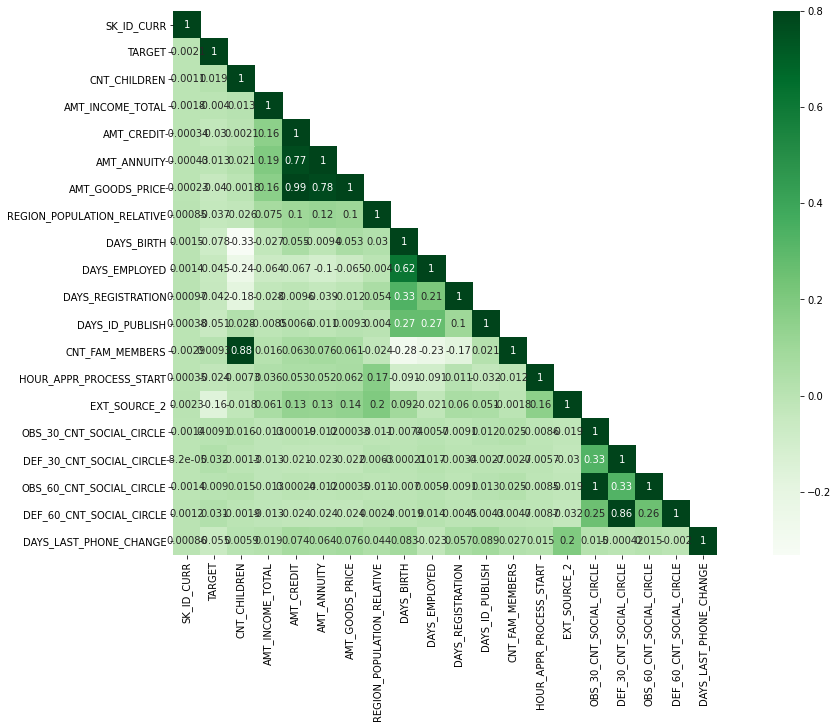

In [31]:
corrMatt = application_train.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, cmap="Greens", mask=mask,vmax=.8, square=True,annot=True)

Можна помітити кореляцію між колонками CNT_FAM_MEMBERS - CNT_CHILDREN, AMT_CREDIT - AMT_GOODS_PRICE, DEF_30_CNT_SOCIAL_CIRCLE - DEF_60_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE - OBS_30_CNT_SOCIAL_CIRCLE та REGION_RATING_CLIENT_W_CITY - REGION_RATING_CLIENT

In [32]:
application_train = application_train.drop(columns=['CNT_FAM_MEMBERS','OBS_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','AMT_GOODS_PRICE','AMT_ANNUITY','REGION_RATING_CLIENT_W_CITY'])
application_test = application_test.drop(columns=['CNT_FAM_MEMBERS','OBS_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','AMT_GOODS_PRICE','AMT_ANNUITY','REGION_RATING_CLIENT_W_CITY'])
numerical_features = numerical_features.drop(labels=['CNT_FAM_MEMBERS','OBS_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','AMT_ANNUITY','AMT_GOODS_PRICE'])
categorical_features = categorical_features.difference(['REGION_RATING_CLIENT_W_CITY'])

# Outliers

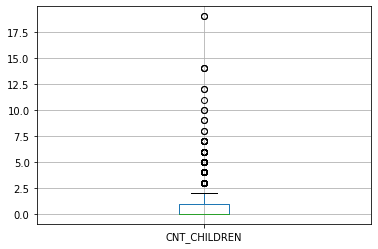

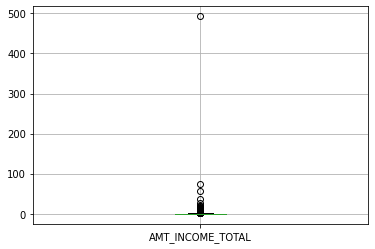

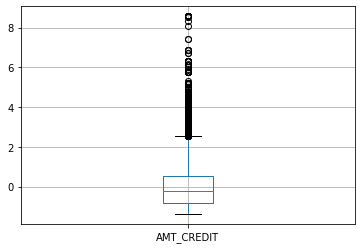

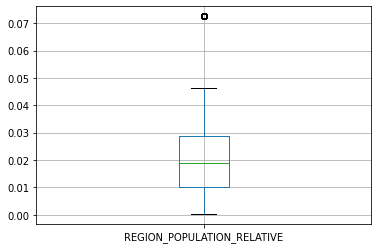

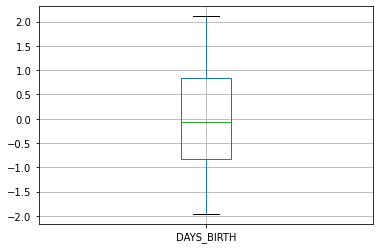

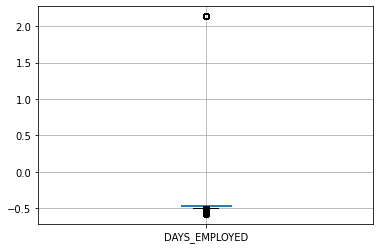

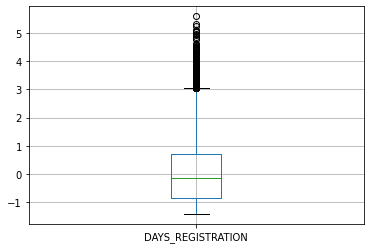

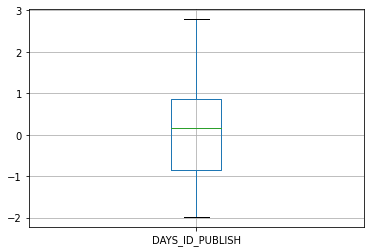

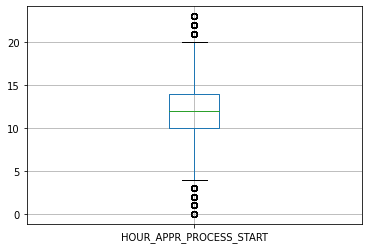

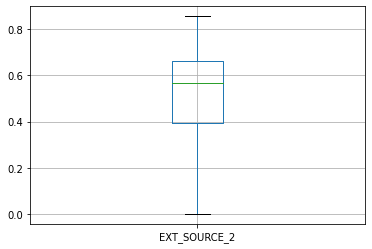

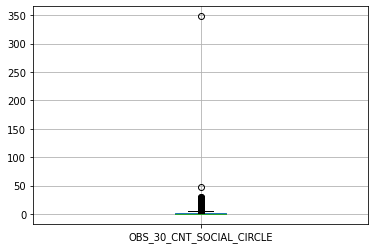

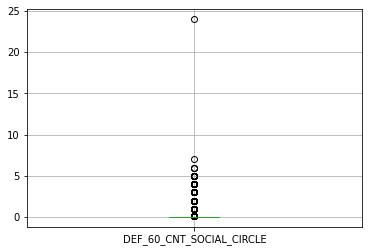

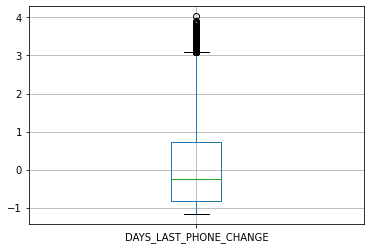

In [33]:
for column in numerical_features:
    plt.figure()
    application_train.boxplot([column])

In [34]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [35]:
low, up = remove_outlier(application_train['DAYS_EMPLOYED'])
application_train['DAYS_EMPLOYED'] = np.where(application_train['DAYS_EMPLOYED'] > up, up, application_train['DAYS_EMPLOYED'])
application_train['DAYS_EMPLOYED'] = np.where(application_train['DAYS_EMPLOYED'] < low, low, application_train['DAYS_EMPLOYED'])
application_train['DAYS_EMPLOYED'] = abs(application_train['DAYS_EMPLOYED'])
application_test['DAYS_EMPLOYED'] = abs(application_test['DAYS_EMPLOYED'])

In [36]:
low, up = remove_outlier(application_train['OBS_30_CNT_SOCIAL_CIRCLE'])
application_train['OBS_30_CNT_SOCIAL_CIRCLE'] = np.where(application_train['OBS_30_CNT_SOCIAL_CIRCLE'] > up, up, application_train['OBS_30_CNT_SOCIAL_CIRCLE'])
application_train['OBS_30_CNT_SOCIAL_CIRCLE'] = np.where(application_train['OBS_30_CNT_SOCIAL_CIRCLE'] < low, low, application_train['OBS_30_CNT_SOCIAL_CIRCLE'])

In [37]:
low, up = remove_outlier(application_train['DEF_60_CNT_SOCIAL_CIRCLE'])
application_train['DEF_60_CNT_SOCIAL_CIRCLE'] = np.where(application_train['DEF_60_CNT_SOCIAL_CIRCLE'] > up, up, application_train['DEF_60_CNT_SOCIAL_CIRCLE'])
application_train['DEF_60_CNT_SOCIAL_CIRCLE'] = np.where(application_train['DEF_60_CNT_SOCIAL_CIRCLE'] < low, low, application_train['DEF_60_CNT_SOCIAL_CIRCLE'])

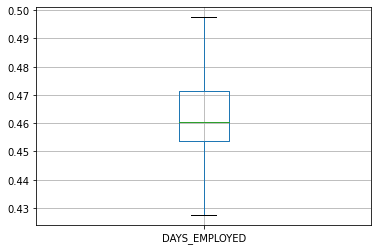

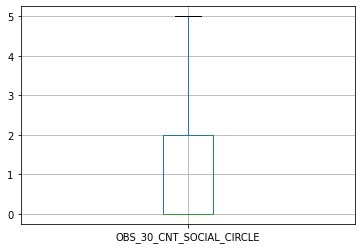

In [38]:
application_train.boxplot(column=['DAYS_EMPLOYED'])
plt.show()
application_train.boxplot(column=['OBS_30_CNT_SOCIAL_CIRCLE'])
plt.show()

# Pairplot

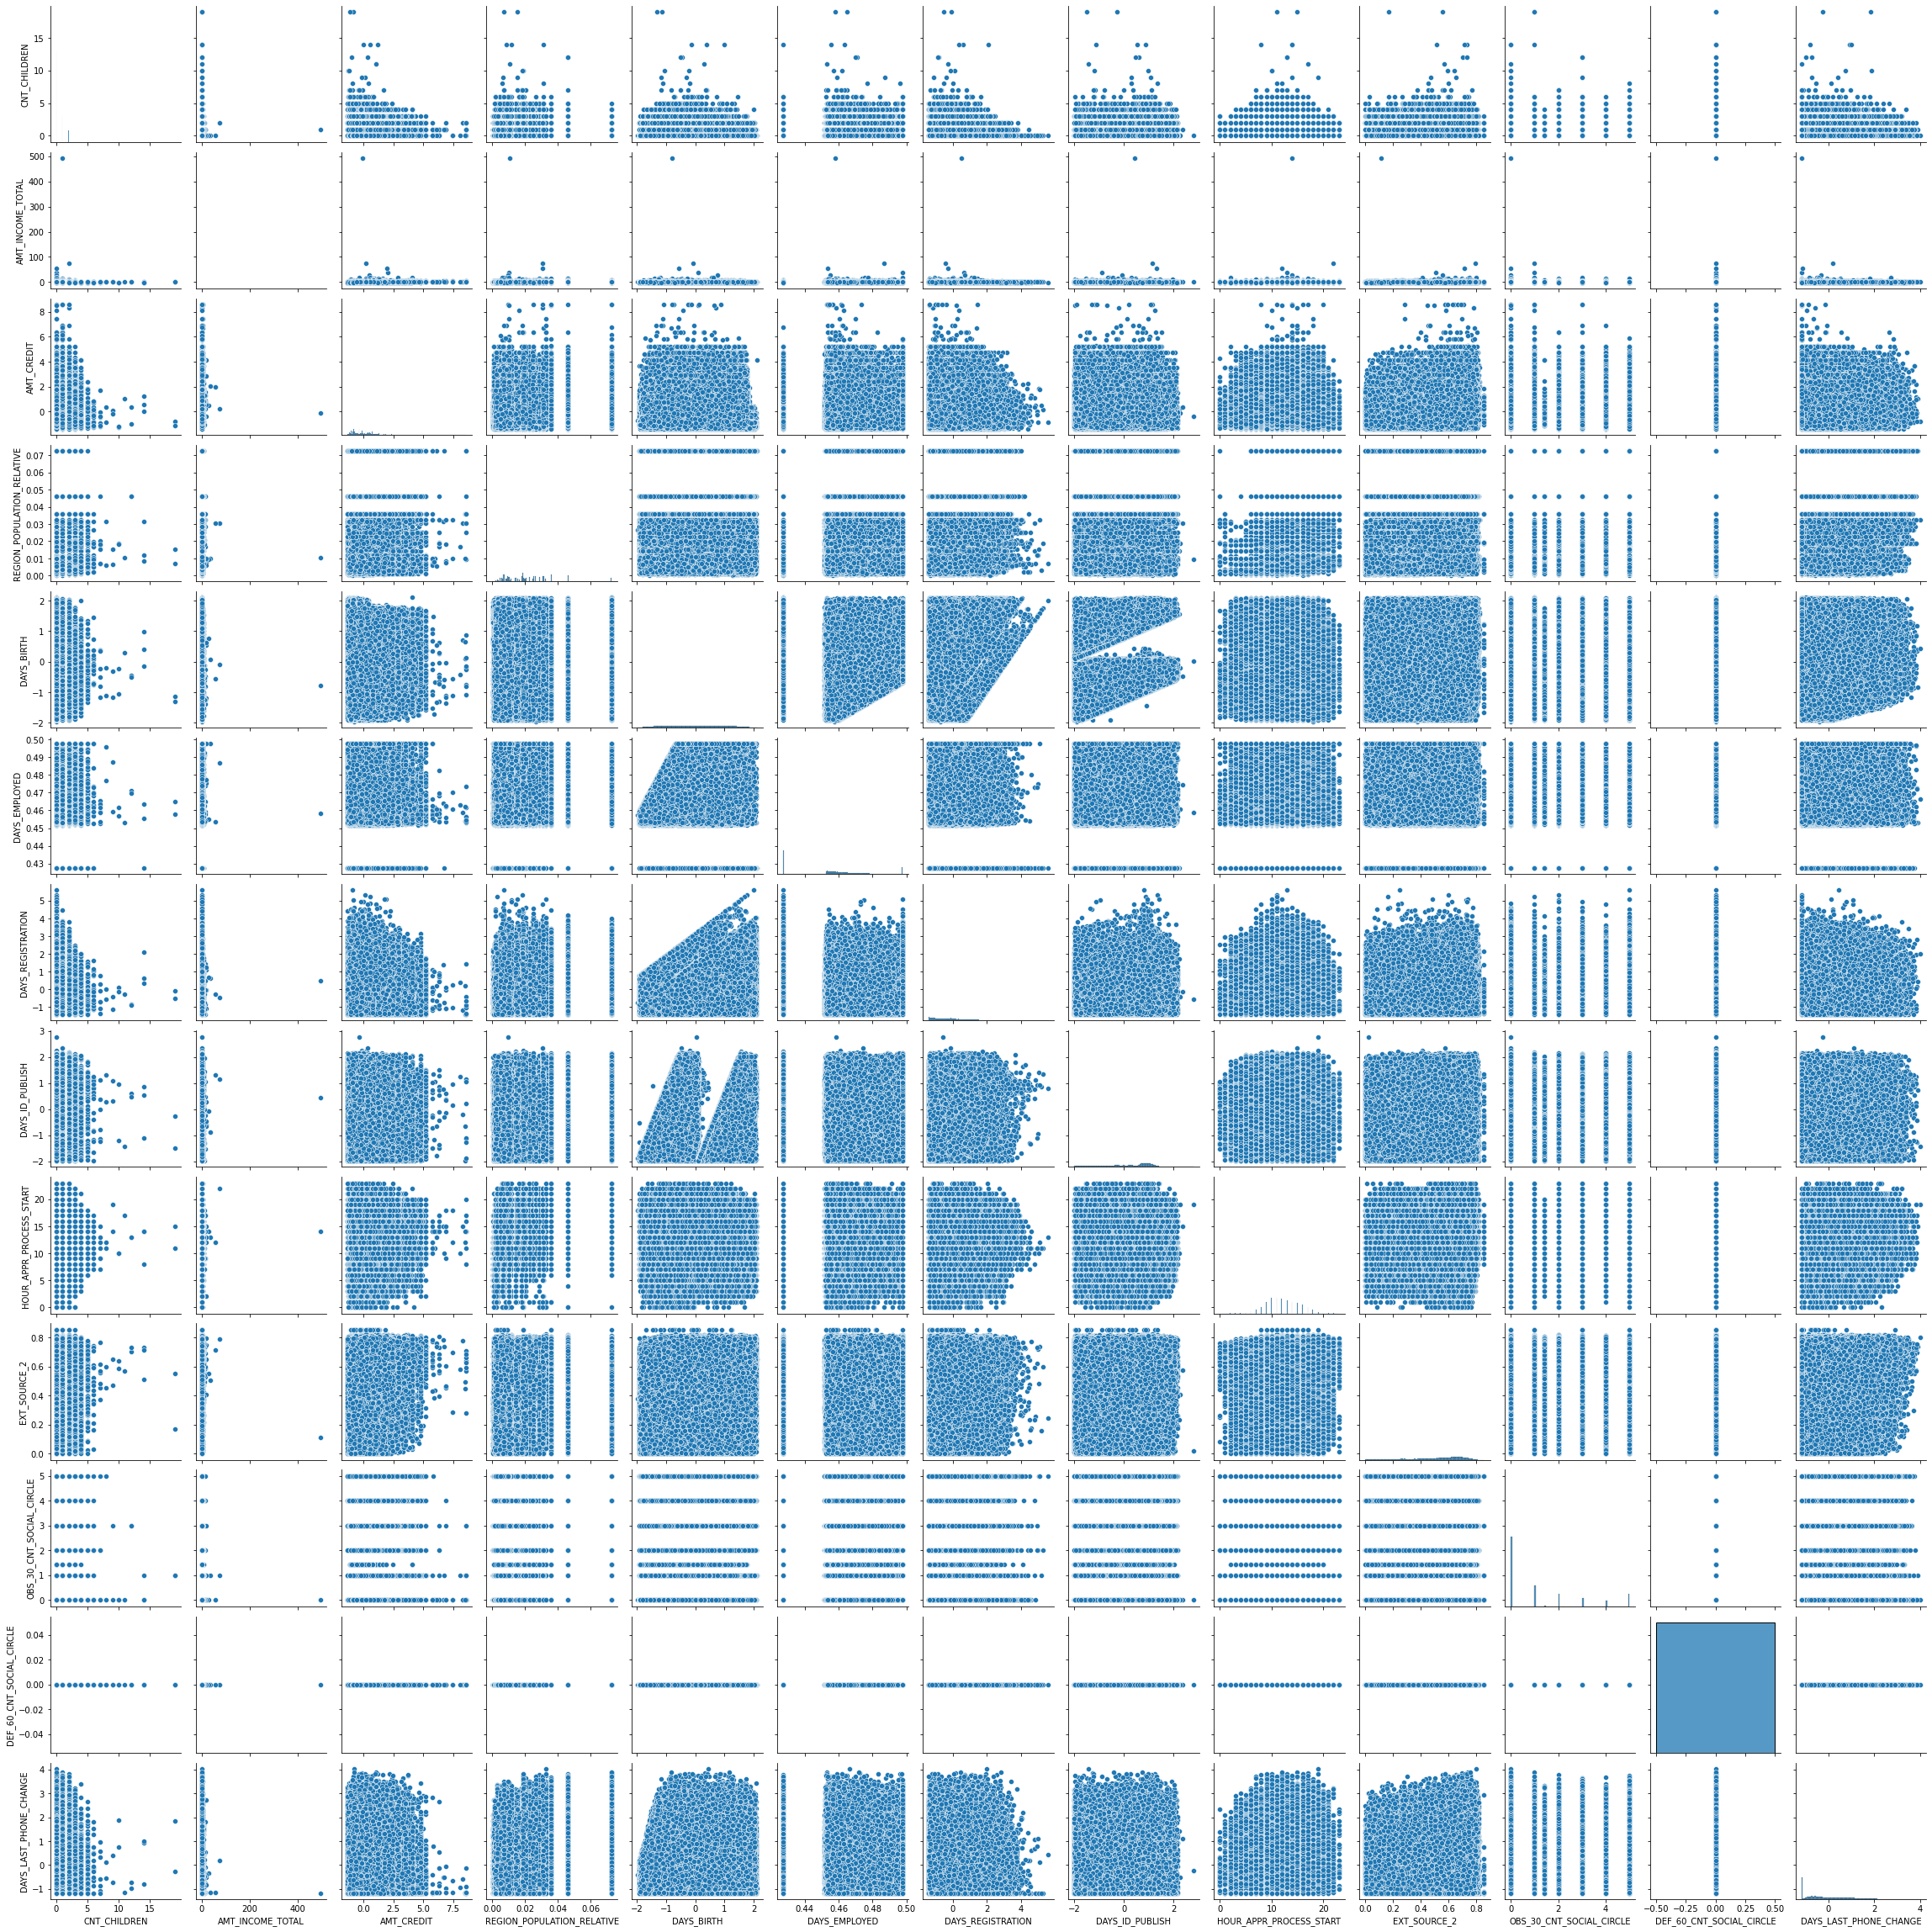

In [39]:
sns.pairplot(application_train[numerical_features])

# Classification

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [41]:
application_train["NAME_EDUCATION_TYPE"] = application_train["NAME_EDUCATION_TYPE"].astype('category').cat.codes
application_test["NAME_EDUCATION_TYPE"] = application_test["NAME_EDUCATION_TYPE"].astype('category').cat.codes

application_train = pd.get_dummies(application_train)
application_test = pd.get_dummies(application_test)

Вирішуємо проблему із відсутніми колонками у тестовому датасеті

In [42]:
missing_cols = set( application_train.columns ) - set( application_test.columns )
missing_cols.remove('TARGET')
for c in missing_cols:
    application_test[c] = 0
application_test = application_test[application_train.drop(columns=['TARGET']).columns]

In [43]:
data_train = application_train.drop(columns=['TARGET','SK_ID_CURR'])

In [44]:
train_x, test_x, train_y, test_y = train_test_split(data_train, application_train["TARGET"], test_size=0.2)

In [45]:
lr = LogisticRegression()
lr.fit(train_x, train_y)

c:\users\vladp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
train_preds = lr.predict(train_x)
print(f"Train Accuracy: {accuracy_score(train_y, train_preds)}")

Train Accuracy: 0.919453838899548


In [47]:
test_preds = lr.predict(test_x)
print(f"Test Accuracy: {accuracy_score(test_y, test_preds)}")

Test Accuracy: 0.9184755215192755


train:ROC AUC=0.700
test:ROC AUC=0.700


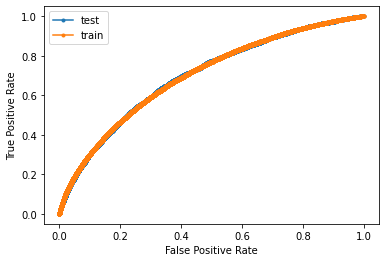

In [48]:
probabilities = lr.predict_proba(application_test.drop(columns=['SK_ID_CURR']))

pd.DataFrame({
    'SK_ID_CURR': application_test['SK_ID_CURR'],       
    'TARGET':     [ row[1] for row in probabilities]
}).to_csv('./sample_submission.csv',index=False)
test_preds = lr.predict_proba(test_x)
test_preds = test_preds[:, 1]
train_preds = lr.predict_proba(train_x)
train_preds = train_preds[:, 1]
lr_auc = roc_auc_score(test_y, test_preds)
tr_auc = roc_auc_score(train_y, train_preds)
print('train:ROC AUC=%.3f' % (tr_auc))
print('test:ROC AUC=%.3f' % (lr_auc))
tr_fpr, tr_tpr, _ = roc_curve(train_y, train_preds)

lr_fpr, lr_tpr, _ = roc_curve(test_y, test_preds)
plt.plot(lr_fpr, lr_tpr, marker='.', label='test')
plt.plot(tr_fpr, tr_tpr, marker='.', label='train')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()